# Worksheet 18

Name:  
UID: 

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 0.5 ])
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

In [ ]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-10,10,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()



c) How does the estimate of `beta` compare to the parameters we used to generate the data?

beta is very close to the parameter we used to generate the data. green and blue lines are most overlap.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

In [ ]:
SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3,0.5 ])
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + true_beta[2] * x*x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

In [ ]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x, x**2]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-10,10,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot +beta_hat[2] *x_plot*x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot + true_beta[2] *x_plot*x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()
print(beta_hat)

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

beta is almost the same as the parameters we used to generate the data.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

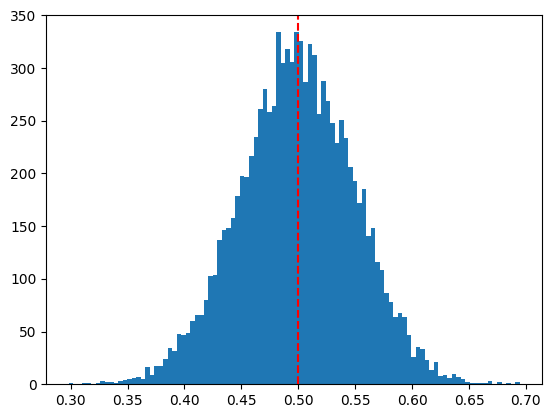

In [3]:
import numpy as np
import matplotlib.pyplot as plt
SAMPLE_SIZE = 100
betas = []
true_beta = np.array([1,0.5 ])
for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + np.random.random(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    betas.append(np.linalg.inv(X.T @ X) @ X.T @ y)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()